In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
import math
from ukf_filter import make_ukf_accel_filter, make_ukf_velocity_filter

In [2]:
from radar_simulation import generate_data, generate_data_maneuver, azimuth_to_xy

dt_sec = 0.05
range_std_m = 0.1
elevation_angle_std_deg = 2
track, zs = generate_data(dt_sec=dt_sec, heading=0, v0_m_sec=1.2, range_std_m=range_std_m, elevation_angle_std_deg=elevation_angle_std_deg)
zs = np.flipud(zs)

z_r = zs[:, 0]
z_azimuth = zs[:, 1]
sensor_xs, sensor_ys = azimuth_to_xy(*zip(*zs))

In [3]:
kf = make_ukf_velocity_filter(dt_sec, range_std_m, elevation_angle_std_deg, p_alpha=1)
# 初期値設定
kf.x = np.array([sensor_xs[0], -0.6, sensor_ys[0], -0.6])
kf.P = np.eye(4) * 10

xs, ys = [], []
vxs, vys = [], []
for i, z in enumerate(zs):
    if i == 0:
        continue
    kf.predict()
    kf.update(z)
    xs.append(kf.x[0])
    ys.append(kf.x[2])
    vxs.append(kf.x[1])
    vys.append(kf.x[3])

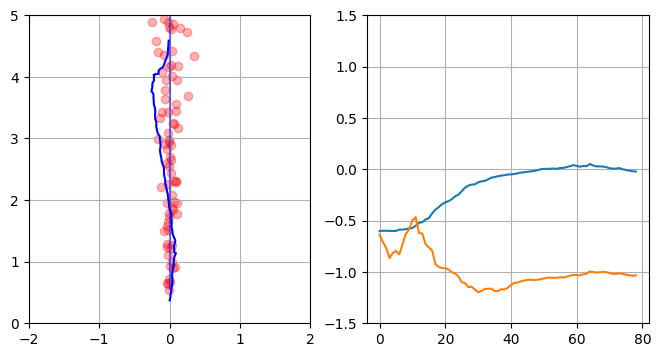

In [4]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(sensor_xs, sensor_ys, color='r', alpha=0.3)
plt.plot(xs, ys, color="b")
plt.plot(*zip(*track), color="b", alpha=0.5)
plt.xlim([-2,2])
plt.ylim([0,5])
plt.grid()
plt.subplot(122)
plt.plot(vxs)
plt.plot(vys)
plt.ylim([-1.5, 1.5])
plt.grid()

In [5]:
kf = make_ukf_accel_filter(dt_sec, range_std_m, elevation_angle_std_deg, p_alpha=1)
# 初期値設定
kf.x = np.array([sensor_xs[0], -0.6, 0, sensor_ys[0], -0.6, 0])
kf.P = np.eye(6) * 10

xs, ys = [], []
vxs, vys = [], []
for i, z in enumerate(zs):
    if i == 0:
        continue
    kf.predict()
    kf.update(z)
    xs.append(kf.x[0])
    ys.append(kf.x[3])
    vxs.append(kf.x[1])
    vys.append(kf.x[4])

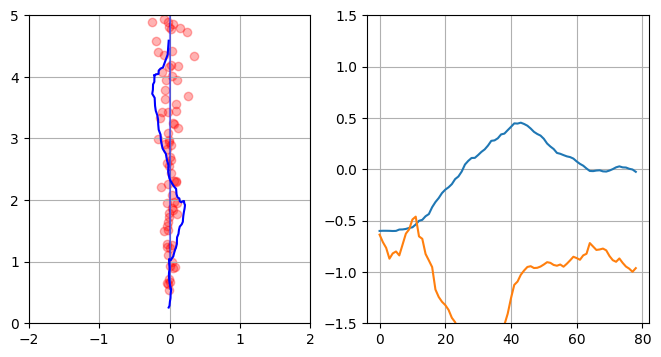

In [6]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(sensor_xs, sensor_ys, color='r', alpha=0.3)
plt.plot(xs, ys, color="b")
plt.plot(*zip(*track), color="b", alpha=0.5)
plt.xlim([-2,2])
plt.ylim([0,5])
plt.grid()
plt.subplot(122)
plt.plot(vxs)
plt.plot(vys)
plt.ylim([-1.5, 1.5])
plt.grid()

In [37]:
dt_sec = 0.05
range_std_m = 0.1
elevation_angle_std_deg = 2

track, zs = generate_data_maneuver(dt_sec=dt_sec, steady_count=50, range_std_m=range_std_m, elevation_angle_std_deg=elevation_angle_std_deg)
z_r = zs[:, 0]
z_azimuth = zs[:, 1]
zs = np.flipud(zs)

sensor_xs, sensor_ys = azimuth_to_xy(*zip(*zs))

In [38]:
kf = make_ukf_accel_filter(dt_sec, range_std_m, elevation_angle_std_deg, p_alpha=1)
# 初期値設定
kf.x = np.array([sensor_xs[0], -0.6, 0, sensor_ys[0], -0.6, 0])
kf.P = np.eye(6) * 10

xs, ys = [], []
vxs, vys = [], []
for i, z in enumerate(zs):
    if i == 0:
        continue
    kf.predict()
    kf.update(z)
    xs.append(kf.x[0])
    ys.append(kf.x[3])
    vxs.append(kf.x[1])
    vys.append(kf.x[4])

In [39]:
kf = make_ukf_velocity_filter(dt_sec, range_std_m, elevation_angle_std_deg, q_var=20.0, p_alpha=1)
# 初期値設定
kf.x = np.array([sensor_xs[0], -0.6, sensor_ys[0], -0.6])
kf.P = np.eye(4) * 10

xs, ys = [], []
vxs, vys = [], []
for i, z in enumerate(zs):
    if i == 0:
        continue
    kf.predict()
    kf.update(z)
    xs.append(kf.x[0])
    ys.append(kf.x[2])
    vxs.append(kf.x[1])
    vys.append(kf.x[3])

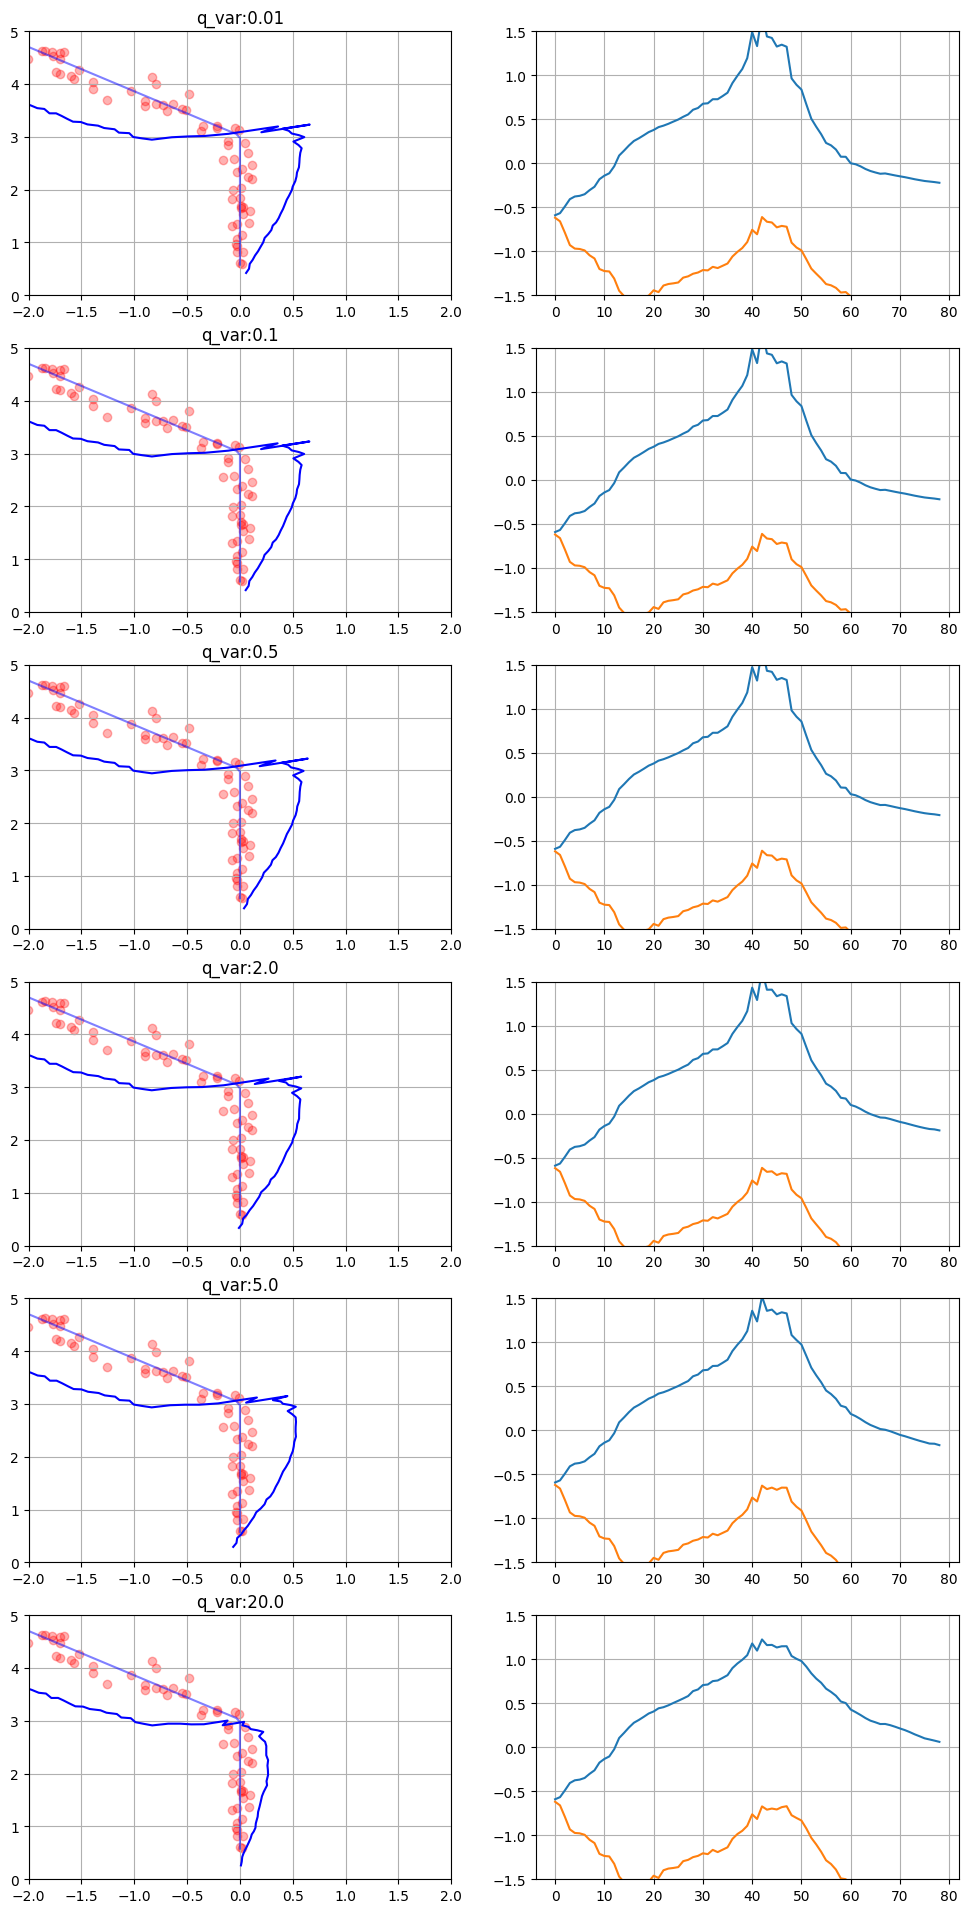

In [40]:
q_vars = [0.01, 0.1, 0.5, 2.0, 5.0, 20.0]
plt.figure(figsize=(12,24))

for gi, q_var in enumerate(q_vars):
    kf = make_ukf_velocity_filter(dt_sec, range_std_m, elevation_angle_std_deg, q_var=q_var, p_alpha=1)
    # 初期値設定
    kf.x = np.array([sensor_xs[0], -0.6, sensor_ys[0], -0.6])
    kf.P = np.eye(4) * 10
    
    xs, ys = [], []
    vxs, vys = [], []
    for i, z in enumerate(zs):
        if i == 0:
            continue
        kf.predict()
        kf.update(z)
        xs.append(kf.x[0])
        ys.append(kf.x[2])
        vxs.append(kf.x[1])
        vys.append(kf.x[3])

    plt.subplot(6,2,gi*2+1)
    plt.scatter(sensor_xs, sensor_ys, color='r', alpha=0.3)
    plt.plot(xs, ys, color="b")
    plt.plot(*zip(*track), color="b", alpha=0.5)
    plt.xlim([-2,2])
    plt.ylim([0,5])
    plt.grid()
    plt.title(f"q_var:{q_var}")
    plt.subplot(6,2,gi*2+2)
    plt.plot(vxs)
    plt.plot(vys)
    plt.ylim([-1.5, 1.5])
    plt.grid()

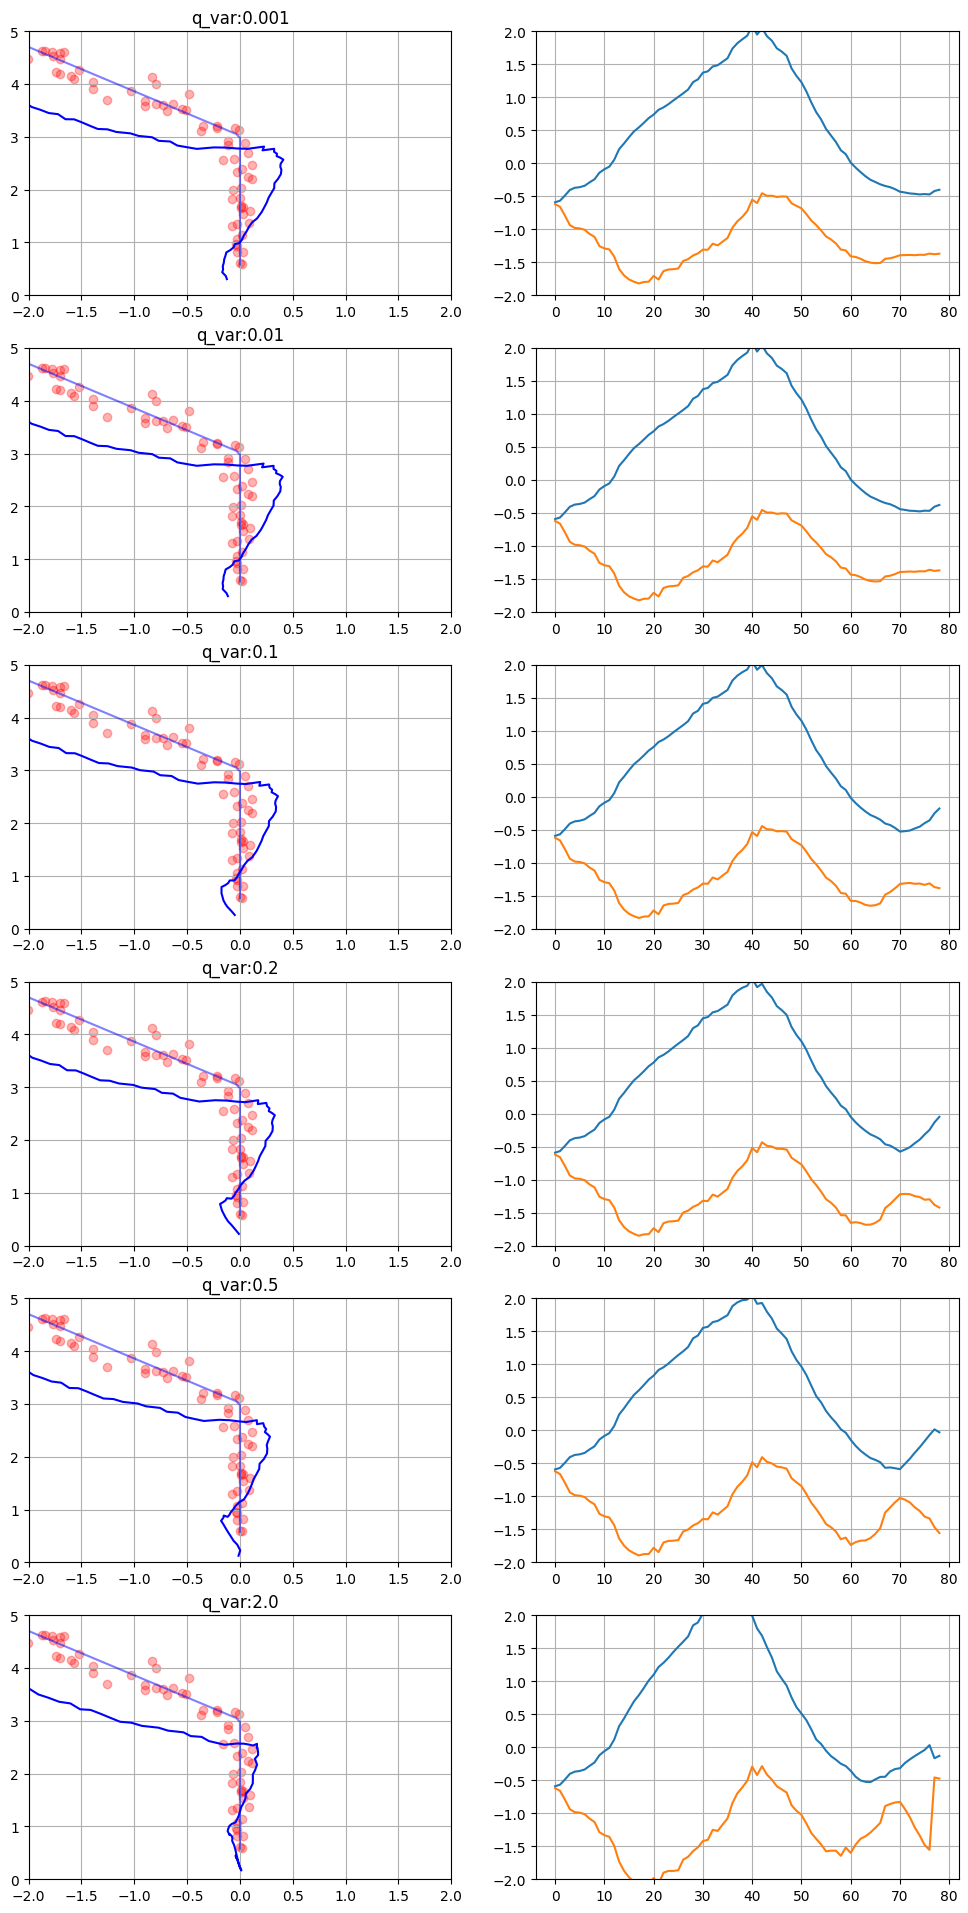

In [41]:
q_vars = [0.001, 0.01, 0.1, 0.2, 0.5, 2.0]
plt.figure(figsize=(12,24))

for gi, q_var in enumerate(q_vars):
    kf = make_ukf_accel_filter(dt_sec, range_std_m, elevation_angle_std_deg, q_var=q_var, p_alpha=1)
    # 初期値設定
    kf.x = np.array([sensor_xs[0], -0.6, 0, sensor_ys[0], -0.6, 0])
    kf.P = np.eye(6) * 10
    
    xs, ys = [], []
    vxs, vys = [], []
    for i, z in enumerate(zs):
        if i == 0:
            continue
        kf.predict()
        kf.update(z)
        xs.append(kf.x[0])
        ys.append(kf.x[3])
        vxs.append(kf.x[1])
        vys.append(kf.x[4])

    plt.subplot(6,2,gi*2+1)
    plt.scatter(sensor_xs, sensor_ys, color='r', alpha=0.3)
    plt.plot(xs, ys, color="b")
    plt.plot(*zip(*track), color="b", alpha=0.5)
    plt.xlim([-2,2])
    plt.ylim([0,5])
    plt.grid()
    plt.title(f"q_var:{q_var}")
    plt.subplot(6,2,gi*2+2)
    plt.plot(vxs)
    plt.plot(vys)
    plt.ylim([-2.0, 2.0])
    plt.grid()